# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [11]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc = 1.2
my_eth = 5.3

In [12]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [15]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response = requests.get(btc_url).json()
btc_response
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
# YOUR CODE HERE!]
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $22354.57
The current value of your 5.3 ETH is $2697.33


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [26]:
# Current amount of shares
# YOUR CODE HERE!

my_spy = 50
my_agg = 200

In [27]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [28]:
# Format current date as ISO format
# YOUR CODE HERE!
from datetime import datetime
startdate = datetime.now()
today=pd.Timestamp(startdate,tz='America/New_York').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_investments = alpaca.get_barset(tickers,timeframe,start=today).df
# Preview DataFrame
# YOUR CODE HERE!
df_investments.head()

AGG                                     SPY  \
                             open    high     low   close   volume   open   
2020-11-20 00:00:00-05:00  118.19  118.34  118.13  118.29  5496191  357.5   

                                                             
                             high     low   close    volume  
2020-11-20 00:00:00-05:00  357.72  355.25  355.34  47947194

In [29]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = round(df_investments[tickers[0]]['close'][0],2)
spy_close_price = round(df_investments[tickers[1]]['close'][0],2)
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.29
Current SPY closing price: $355.34


In [31]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17767.00
The current value of your 200 AGG shares is $23658.00


### Savings Health Analysis

In [37]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value
]
df_savings = pd.DataFrame(savings_data, columns=['amount'],index=['crypto','shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,25051.901
shares,41425.000


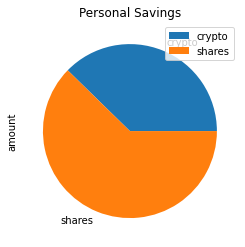

In [40]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount',title='Personal Savings')

In [42]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = float(df_savings.sum())
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund')
elif total_savings == emergency_fund:
    print('You have exactly 3 months worth of income saved up')
else:
    print('You need '+str(emergency_fund-total_savings)+'more to save!')

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [43]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-11-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-20', tz='America/New_York').isoformat()

In [44]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(tickers,timeframe,start=start_date,end=end_date).df
# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
2015-11-20 00:00:00-05:00  108.77  108.82  108.6000  108.62  1893587.0   
2015-11-23 00:00:00-05:00  108.65  108.76  108.5700  108.68  1595639.0   
2015-11-24 00:00:00-05:00  108.75  108.80  108.6611  108.73  1153821.0   
2015-11-25 00:00:00-05:00  108.77  108.84  108.6900  108.78  1059092.0   
2015-11-27 00:00:00-05:00  108.85  108.87  108.7700  108.79   605603.0   

                              SPY                                    
                             open    high     low   close    volume  
2015-11-20 00:00:00-05:00  209.45  210.12  208.86  209.35  67021762  
2015-11-23 00:00:00-05:00  209.38  209.98  208.52  209.06  54738608  
2015-11-24 00:00:00-05:00  207.87  209.83  207.41  209.38  81748691  
2015-11-25 00:00:00-05:00  209.50  209.74  209.01  209.32  42760518  
2015-11-27 00:00:00-05:00  209.43  209.80  208.86  209.53  27557063

In [45]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_thirty_year = MCSimulation(portfolio_data=df_stock_data, weights=[.4,.6], num_simulation=500,num_trading_days=252*30)

In [46]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004607,1.003910,0.996796,0.988595,1.010498,1.003387,0.995515,0.989373,1.006623,0.999084,...,0.987589,0.995876,0.996884,1.012945,0.995149,1.006329,1.002288,0.995134,0.997013,1.016036
2,1.011899,0.990772,0.994602,0.979430,1.003017,1.015594,1.000589,0.990399,1.009811,0.996608,...,0.976491,1.003179,0.989944,1.001504,0.987250,1.005414,0.999166,1.003697,0.994427,1.018787
3,1.010013,0.985171,0.991859,0.972758,1.002766,1.029413,1.001257,0.993812,1.016899,0.999478,...,0.979328,1.010366,0.983967,1.011113,0.988686,1.000312,0.991332,1.003758,0.990196,1.009746
4,1.007872,0.980724,0.988162,0.978404,0.995246,1.025808,1.004641,0.989547,1.016498,1.004819,...,0.974995,1.012192,0.986973,1.012846,0.999722,0.998578,0.991384,1.015056,0.984145,0.997569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.365607,4.900030,14.473578,8.429085,5.701315,9.278476,9.008223,4.291745,4.664057,7.557795,...,29.899195,5.056194,16.015481,9.684784,13.566951,5.549153,8.596608,7.493596,11.725188,5.498759
7557,4.321163,4.933077,14.478873,8.509265,5.675114,9.328063,9.010538,4.290003,4.719915,7.508096,...,30.135971,5.051576,16.009143,9.833592,13.555703,5.557939,8.693207,7.557388,11.665734,5.539412
7558,4.281563,4.873139,14.538124,8.530240,5.672154,9.354480,8.827577,4.285774,4.693158,7.554755,...,30.286300,5.052364,15.993763,9.827757,13.574399,5.576806,8.566710,7.566168,11.666273,5.554801
7559,4.315131,4.875297,14.307463,8.577019,5.641436,9.397927,8.917697,4.263420,4.690441,7.641099,...,30.397376,4.968161,15.902793,9.837702,13.517581,5.609706,8.667722,7.461981,11.675212,5.543194


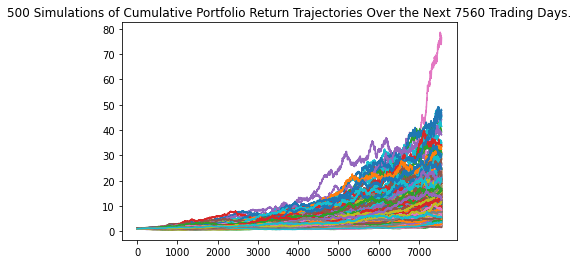

In [48]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirty_year.plot_simulation()

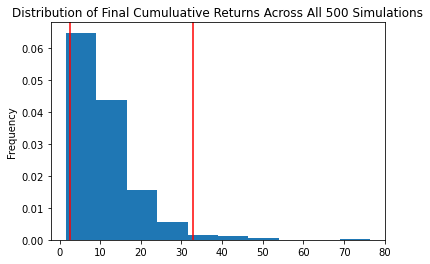

In [49]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirty_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             11.521946
std               8.262134
min               1.546486
25%               5.986986
50%               9.262671
75%              14.595077
max              76.415380
95% CI Lower      2.606539
95% CI Upper     32.887663
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [52]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[-2]*initial_investment,2)
ci_upper = round(tbl[-1]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $52130.79 and $657753.26


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [53]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[-2]*initial_investment,2)
ci_upper = round(tbl[-1]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $78196.18 and $986629.9


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [55]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_five_year = MCSimulation(portfolio_data=df_stock_data,weights=[.5,.5],num_simulation=500,num_trading_days=252*5)

In [56]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003630,0.998741,1.003462,0.986556,1.015222,0.996075,0.992334,1.004530,0.997150,0.984829,...,1.002759,1.004710,1.003122,0.991155,0.992232,1.002851,1.000441,0.993709,0.996944,1.006939
2,1.005888,1.003479,1.005023,0.985428,1.015704,1.004945,0.988828,0.998814,0.996361,0.990869,...,1.001965,1.013148,1.001391,0.994319,0.983919,0.998900,1.000575,0.993334,0.998152,1.010693
3,1.006705,0.990731,1.003741,0.981495,1.019592,1.002024,0.990022,1.003972,1.000316,0.998762,...,0.997081,1.007721,1.011219,0.990264,0.991200,1.008373,1.003149,1.009230,0.993645,1.014591
4,1.013471,0.994963,1.001132,0.975671,1.019367,1.002581,0.978082,1.013868,0.996422,0.994545,...,0.991052,1.010818,1.003263,1.001931,0.977540,1.007414,1.007749,1.023375,0.998270,1.013705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.360210,2.180628,1.551975,1.474717,1.641293,1.403338,1.553585,1.605220,0.975285,1.409561,...,1.247027,2.126776,1.541192,2.429826,1.566954,1.237724,1.509303,0.943904,1.446905,1.112466
1257,1.356775,2.170166,1.550839,1.470172,1.642261,1.416854,1.547958,1.599296,0.969716,1.409723,...,1.245128,2.110135,1.533033,2.418212,1.573000,1.240849,1.509381,0.951837,1.457815,1.102332
1258,1.356577,2.180539,1.555380,1.461246,1.644966,1.423911,1.556717,1.607539,0.985101,1.425182,...,1.247632,2.076832,1.539937,2.414653,1.572136,1.245666,1.512845,0.964070,1.464516,1.101100
1259,1.365961,2.183596,1.559386,1.465359,1.630399,1.439552,1.548713,1.611867,0.973164,1.430902,...,1.256993,2.074967,1.551034,2.426040,1.568866,1.246353,1.515495,0.964323,1.447224,1.097107


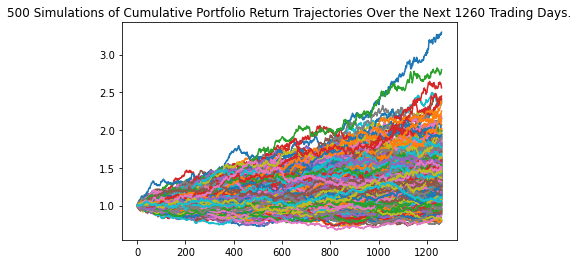

In [57]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot_5yr = MC_five_year.plot_simulation()

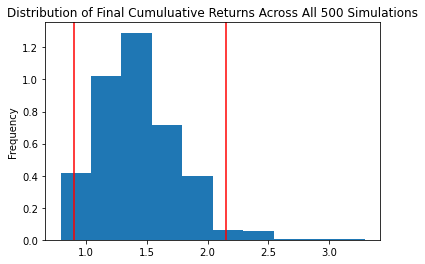

In [58]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot_5yr = MC_five_year.plot_distribution()

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_5yr = MC_five_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl_5yr)

count           500.000000
mean              1.431311
std               0.331190
min               0.788098
25%               1.206455
50%               1.404623
75%               1.612179
max               3.296412
95% CI Lower      0.901212
95% CI Upper      2.154542
Name: 1260, dtype: float64


In [60]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_upper_five = round(tbl_5yr[-1]*initial_investment,2)
ci_lower_five = round(tbl_5yr[-2]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54072.7 and $129272.5


### Ten Years Retirement Option

In [62]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_ten_year = MCSimulation(portfolio_data=df_stock_data,weights=[.5,.5],num_simulation=500,num_trading_days=252*10)

In [63]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999909,0.999181,0.999242,1.008329,1.001740,1.005421,0.992846,0.993151,1.015607,0.998300,...,0.999466,1.004508,0.998983,0.998128,0.995403,1.001949,0.998671,0.989082,0.997867,0.992866
2,0.996213,0.995555,1.000062,1.012301,1.003454,1.012608,0.986282,0.989522,1.010376,0.985031,...,1.018163,1.003861,0.997026,0.995647,1.000736,0.996767,0.995278,0.989021,1.000872,0.986820
3,1.000669,0.984940,0.995624,1.020997,0.999086,1.024210,0.982958,0.994463,1.012630,0.976242,...,1.015012,1.002902,1.000941,0.998467,0.996325,0.982846,0.994815,0.992310,1.011640,1.000329
4,1.003405,0.988626,0.995422,1.021106,0.997610,1.028942,0.983824,0.995896,1.000187,0.980001,...,1.020286,1.007389,0.999105,0.987519,0.996514,0.990706,0.989731,1.002172,1.013193,1.007236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.260688,2.212187,4.106841,1.679840,1.534572,1.245008,1.985433,1.399130,1.865450,2.307527,...,1.991688,3.458838,1.841518,2.055512,1.490884,1.774187,1.837038,2.942286,2.305920,2.211944
2517,2.252545,2.226458,4.133703,1.680648,1.544652,1.250405,1.969390,1.394947,1.877298,2.319755,...,2.000914,3.439951,1.827774,2.066932,1.496723,1.771456,1.815001,2.961138,2.296836,2.223125
2518,2.239278,2.228901,4.153016,1.675189,1.555660,1.256554,1.968363,1.389530,1.887703,2.310115,...,1.979027,3.415873,1.829937,2.074730,1.507059,1.765183,1.804166,2.975364,2.292406,2.222458
2519,2.269313,2.233472,4.165603,1.688531,1.557617,1.261017,1.958752,1.400453,1.885424,2.290057,...,2.003898,3.420047,1.842612,2.067223,1.497398,1.747428,1.800622,2.974610,2.297790,2.229215


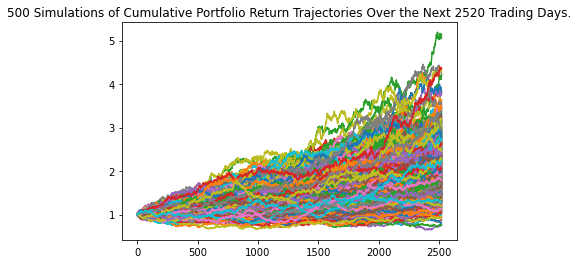

In [64]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_10yr = MC_ten_year.plot_simulation()

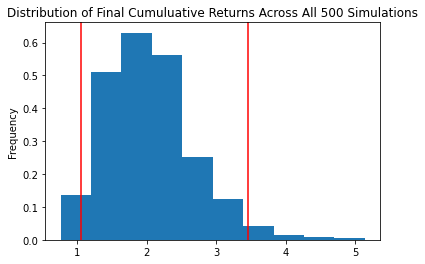

In [65]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
distplot_10yr = MC_ten_year.plot_distribution()

In [67]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_10yr = MC_ten_year.summarize_cumulative_return()
print(tbl_10yr)
# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              2.049113
std               0.633237
min               0.759436
25%               1.591524
50%               1.962367
75%               2.386765
max               5.141961
95% CI Lower      1.056516
95% CI Upper      3.465924
Name: 2520, dtype: float64


In [68]:
# Set initial investment
# YOUR CODE HERE!
initial_investment=60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_upper_ten =round(tbl[-1]*initial_investment,2)
ci_lower_ten=round(tbl[-2]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $156392.36 and $1973259.79
